https://www.kaggle.com/abecklas/fifa-world-cup/version/5

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from PIL import Image

In [2]:
matches_data=pd.read_csv('data\WorldCupMatches.csv')

In [3]:
player_data=pd.read_csv('data\WorldCupPlayers.csv')

cups_data=pd.read_csv('data\WorldCups.csv')

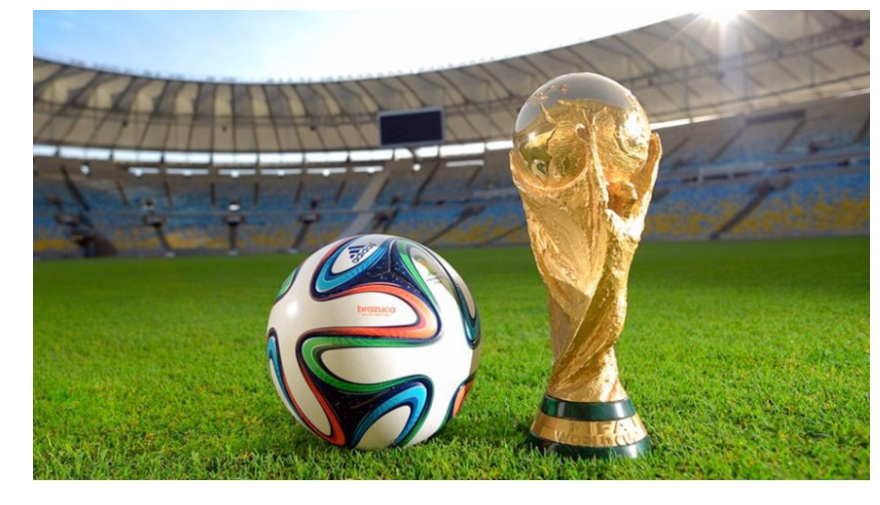

In [4]:
plt.figure(figsize=(15,10))

img=np.array(Image.open(r"C:\Users\avaithil\Pictures\FIFA-World-Cup-Prediction\data\fif.jpg"))

plt.imshow(img,interpolation="bilinear")
plt.axis("off")
plt.show()

In [5]:
matches_data.head()

,Year,Datetime,Stage,Stadium,City,Home Team Name,Home Team Goals,Away Team Goals,Away Team Name,Win conditions,Attendance,Half-time Home Goals,Half-time Away Goals,Referee,Assistant 1,Assistant 2,RoundID,MatchID,Home Team Initials,Away Team Initials
0,1930.0,13 Jul 1930 - 15:00,Group 1,Pocitos,Montevideo,France,4.0,1.0,Mexico,,4444.0,3.0,0.0,LOMBARDI Domingo (URU),CRISTOPHE Henry (BEL),REGO Gilberto (BRA),201.0,1096.0,FRA,MEX
1,1930.0,13 Jul 1930 - 15:00,Group 4,Parque Central,Montevideo,USA,3.0,0.0,Belgium,,18346.0,2.0,0.0,MACIAS Jose (ARG),MATEUCCI Francisco (URU),WARNKEN Alberto (CHI),201.0,1090.0,USA,BEL
2,1930.0,14 Jul 1930 - 12:45,Group 2,Parque Central,Montevideo,Yugoslavia,2.0,1.0,Brazil,,24059.0,2.0,0.0,TEJADA Anibal (URU),VALLARINO Ricardo (URU),BALWAY Thomas (FRA),201.0,1093.0,YUG,BRA
3,1930.0,14 Jul 1930 - 14:50,Group 3,Pocitos,Montevideo,Romania,3.0,1.0,Peru,,2549.0,1.0,0.0,WARNKEN Alberto (CHI),LANGENUS Jean (BEL),MATEUCCI Francisco (URU),201.0,1098.0,ROU,PER
4,1930.0,15 Jul 1930 - 16:00,Group 1,Parque Central,Montevideo,Argentina,1.0,0.0,France,,23409.0,0.0,0.0,REGO Gilberto (BRA),SAUCEDO Ulises (BOL),RADULESCU Constantin (ROU),201.0,1085.0,ARG,FRA


In [6]:

player_data.head()

,RoundID,MatchID,Team Initials,Coach Name,Line-up,Shirt Number,Player Name,Position,Event
0,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Alex THEPOT,GK,NaN
1,201,1096,MEX,LUQUE Juan (MEX),S,0,Oscar BONFIGLIO,GK,NaN
2,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Marcel LANGILLER,NaN,G40'
3,201,1096,MEX,LUQUE Juan (MEX),S,0,Juan CARRENO,NaN,G70'
4,201,1096,FRA,CAUDRON Raoul (FRA),S,0,Ernest LIBERATI,NaN,NaN


In [7]:
cups_data.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [8]:
matches_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4572 entries, 0 to 4571
Data columns (total 20 columns):
Year                    852 non-null float64
Datetime                852 non-null object
Stage                   852 non-null object
Stadium                 852 non-null object
City                    852 non-null object
Home Team Name          852 non-null object
Home Team Goals         852 non-null float64
Away Team Goals         852 non-null float64
Away Team Name          852 non-null object
Win conditions          852 non-null object
Attendance              850 non-null float64
Half-time Home Goals    852 non-null float64
Half-time Away Goals    852 non-null float64
Referee                 852 non-null object
Assistant 1             852 non-null object
Assistant 2             852 non-null object
RoundID                 852 non-null float64
MatchID                 852 non-null float64
Home Team Initials      852 non-null object
Away Team Initials      852 non-null object
dtype

C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  


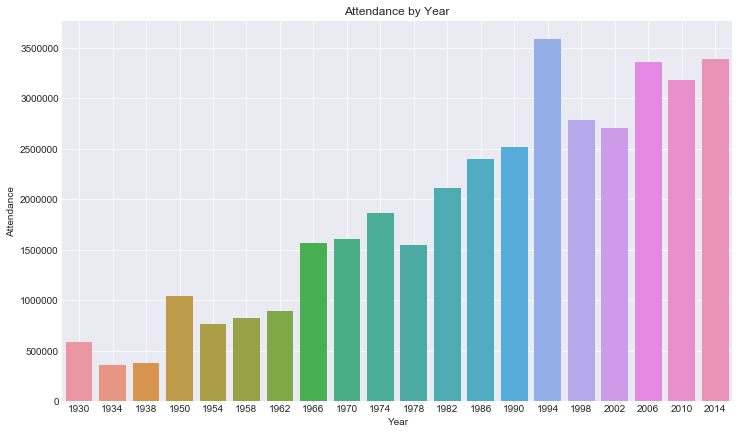

In [9]:
matches_data.isnull().sum()
sns.set_style("darkgrid")

matches=matches_data.drop_duplicates(subset="MatchID",keep="first")

matches=matches[matches_data["Year"].notnull()]
att=matches.groupby("Year")["Attendance"].sum().reset_index()
att["Year"]=att["Year"].astype(int)
plt.figure(figsize=(12,7))
sns.barplot(att['Year'],att['Attendance'],linewidth=1)
plt.grid(True)
plt.title('Attendance by Year')
plt.show()



In [10]:
avg_attendance=matches.groupby("Year")["Attendance"].mean().reset_index()


Text(0.5,1,'Average Attendence by year')

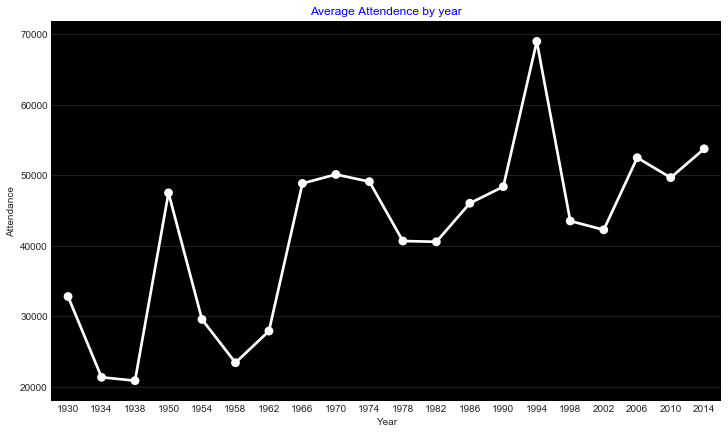

In [11]:
avg_attendance['Year']=avg_attendance['Year'].astype(int)
plt.figure(figsize=(12,7))
plt.grid(True,color="grey",alpha=.3)
ax = sns.pointplot(avg_attendance["Year"],avg_attendance["Attendance"],color="w")
ax.set_facecolor("k")

plt.title('Average Attendence by year',color='b')

Text(0.5,1,'Total goals scored by year')

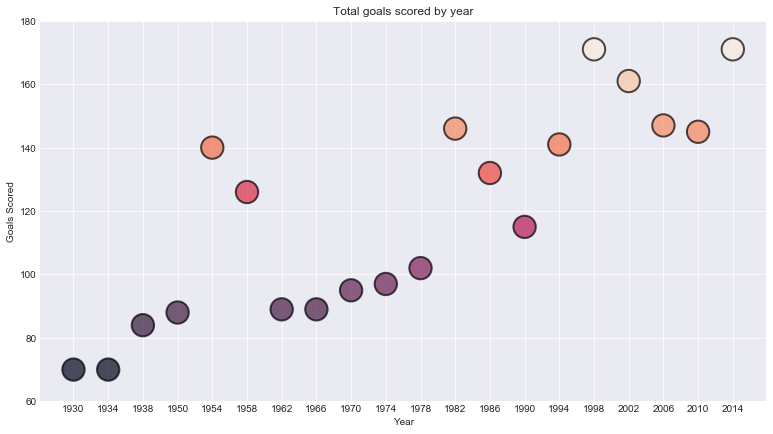

In [12]:
plt.figure(figsize=(13,7))
cups_data['Year']=cups_data['Year'].astype(str)
plt.scatter("Year","GoalsScored",data=cups_data,c=cups_data['GoalsScored'],s=500,alpha=.7,
            linewidth=2,edgecolor="k",)

plt.xticks(cups_data['Year'].unique())
plt.yticks(np.arange(60,200,20))

plt.xlabel('Year')
plt.ylabel('Goals Scored')

plt.title('Total goals scored by year')

Text(0.5,1,'Qualified Teams by year')

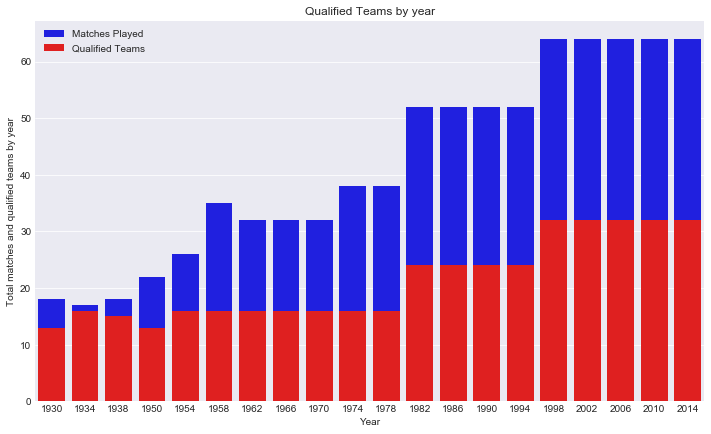

In [13]:
plt.figure(figsize=(12,7))

sns.barplot(cups_data['Year'],cups_data['MatchesPlayed'],data=cups_data,color='b',label='Matches Played')

sns.barplot(cups_data['Year'],cups_data['QualifiedTeams'],data=cups_data,color='r',label='Qualified Teams')
plt.ylabel('Total matches and qualified teams by year')
plt.legend(loc='best')
plt.title('Qualified Teams by year')


In [14]:
h_att=matches.sort_values(by='Attendance',ascending=False)[:10]

In [15]:
h_att=h_att[['Year','Datetime','Stadium','City','Home Team Name','Home Team Goals','Away Team Goals','Away Team Name','Attendance','MatchID']]

In [16]:
h_att['Stadium']=h_att['Stadium'].replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")

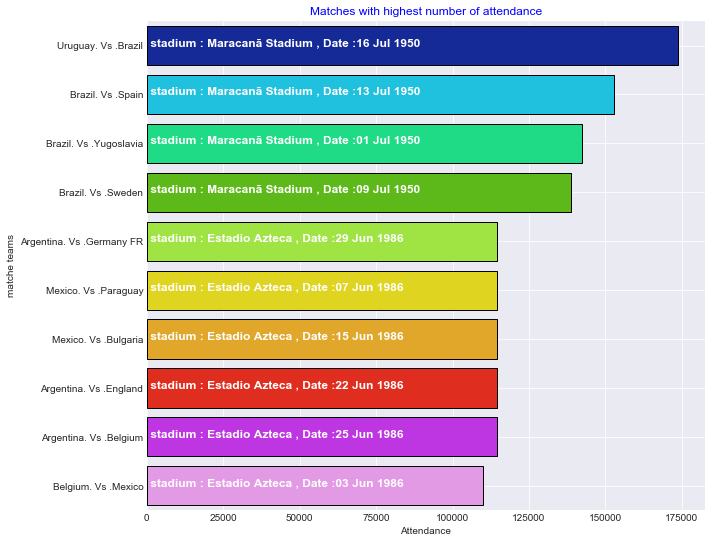

In [17]:
h_att['Datetime']=h_att['Datetime'].str.split("-").str[0]
h_att['mt']=h_att['Home Team Name'] + ". Vs ."+h_att['Away Team Name']
plt.figure(figsize=(10,9))
ax=sns.barplot(y=h_att['mt'],x=h_att['Attendance'],palette="gist_ncar",
                 linewidth = 1,edgecolor="k"*len(h_att))

plt.ylabel('matche teams')
plt.xlabel('Attendance')
plt.title('Matches with highest number of attendance',color='b')
plt.grid(True)

for i,j in enumerate(" stadium : "+h_att["Stadium"]+" , Date :" + h_att["Datetime"]):
    ax.text(.7,i,j,fontsize = 12,color="white",weight = "bold")

plt.show()

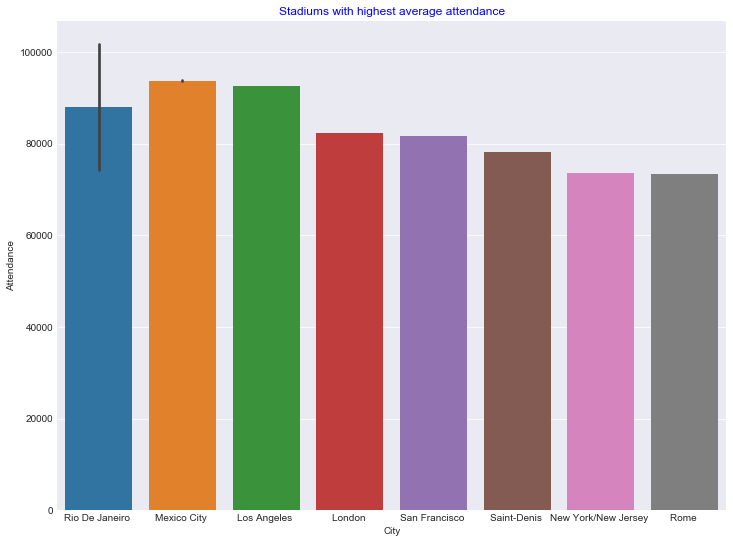

In [18]:
matches['Year']=matches['Year'].astype(int)

matches['Datetime']=matches['Datetime'].str.split("-").str[0]

matches['Stadium']=matches.replace('Maracan� - Est�dio Jornalista M�rio Filho',"Maracanã Stadium")

avg_attend=matches.groupby(["Stadium","City"])["Attendance"].mean().reset_index().sort_values(by='Attendance',ascending=False)

plt.figure(figsize=(12,9))

sns.barplot(avg_attend['City'][:10],avg_attend['Attendance'][:10])



plt.title("Stadiums with highest average attendance",color='b')
plt.show()



In [19]:
matches_count=matches["City"].value_counts().reset_index()[:15]

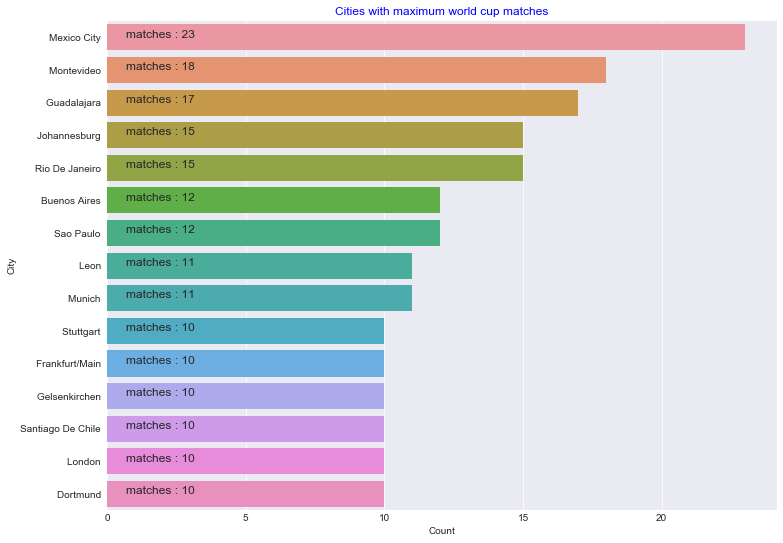

In [20]:
plt.figure(figsize=(12,9))
ax=sns.barplot(matches_count['City'],matches_count['index'])

plt.xlabel('Count')
plt.ylabel('City')
plt.title('Cities with maximum world cup matches',color='b')

for i,j in enumerate("matches : "+matches_count['City'].astype(str)):
    ax.text(.7,i,j,fontsize=12)


In [21]:
hy=matches_data[["Year","Home Team Name"]]
hy.columns=["year","team"]
hy['type']='HOME TEAM'

ay=matches_data[['Year','Away Team Name']]
ay.columns=['year','team']
ay['type']="AWAY TEAM"

home_away=pd.concat([hy,ay],axis=0)





C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until
C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


In [22]:
yt = home_away.groupby(["year","team"]).count().reset_index()

In [23]:
yt=yt['team'].value_counts().reset_index()

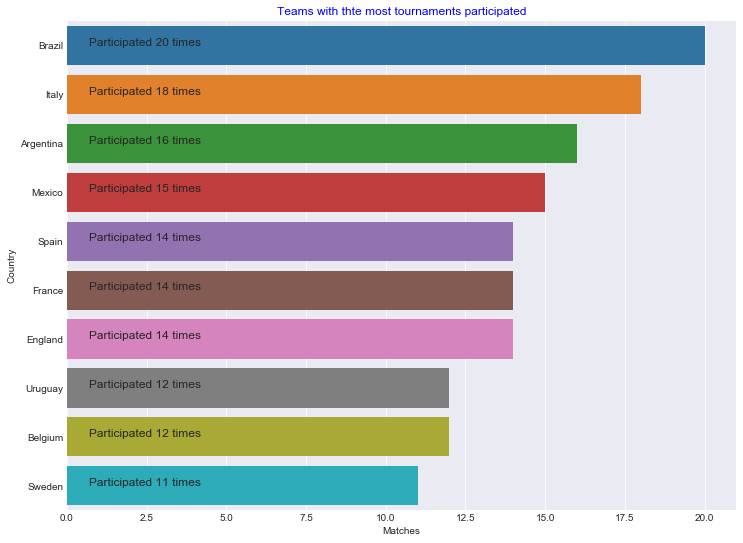

In [24]:
plt.figure(figsize=(12,9))
ax=sns.barplot(yt['team'][:10],yt['index'][:10])
plt.xlabel('Matches')
plt.ylabel('Country')
plt.title('Teams with thte most tournaments participated',color='b')

for i,j in enumerate("Participated "+yt['team'][:10].astype(str)+" times"):
    ax.text(0.7,i,j,fontsize=12)

C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Home Team Goals')

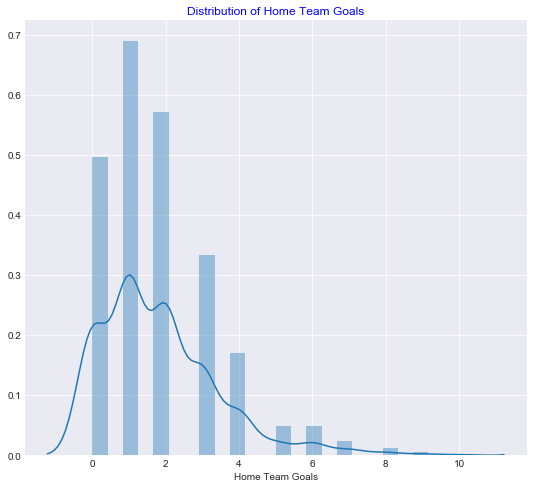

In [25]:
plt.figure(figsize=(9,8))
sns.distplot(matches['Home Team Goals'])

plt.title('Distribution of Home Team Goals',color='b')

C:\Users\avaithil\AppData\Local\Continuum\anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


Text(0.5,1,'Distribution of Away Team Goals')

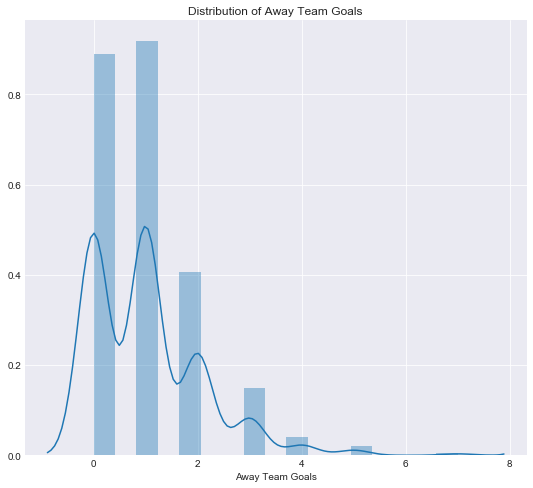

In [26]:
plt.figure(figsize=(9,8))
sns.distplot(matches['Away Team Goals'])
plt.title('Distribution of Away Team Goals')


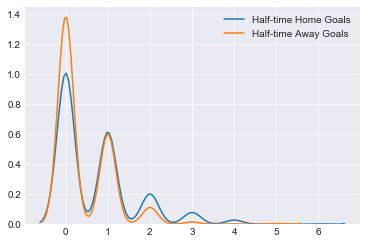

In [27]:

sns.kdeplot(matches['Half-time Home Goals'])

sns.kdeplot(matches['Half-time Away Goals'])

In [28]:
avg_att=matches.groupby("City")["Attendance"].mean().reset_index().sort_values(by='Attendance',ascending=False)

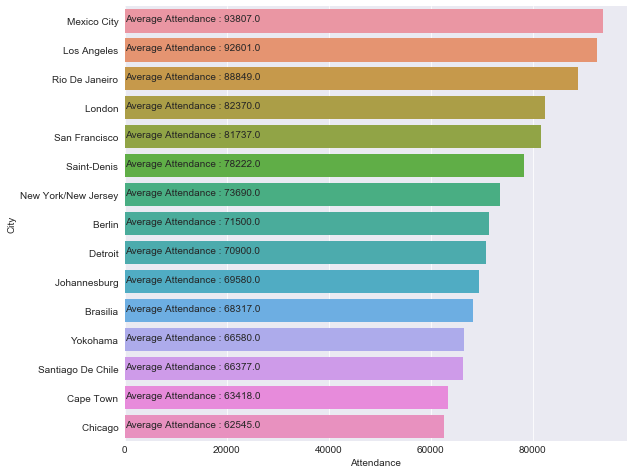

In [29]:
plt.figure(figsize=(9,8))
ax=sns.barplot(x=avg_att['Attendance'][0:15],y=avg_att['City'][0:15])

for i,j in enumerate("Average Attendance"  +" : "+np.around(avg_att["Attendance"][:15],0).astype(str)):
    ax.text(0.7,i,j,fontsize=10)

In [30]:
cups_data.head()

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607


In [31]:
win_counts=cups_data.groupby("Year")['Winner'].value_counts()

In [32]:
win_counts = cups_data.groupby(["Year","Winner"]).count().reset_index()

In [33]:
win_counts=win_counts.Winner.value_counts().reset_index()

In [43]:
c1  = cups_data.groupby("Winner")["Year"].apply(" , ".join).reset_index()

In [88]:
win_counts

,index,Winner
0,Brazil,5
1,Italy,4
2,Germany FR,3
3,Uruguay,2
4,Argentina,2
5,France,1
6,England,1
7,Spain,1
8,Germany,1


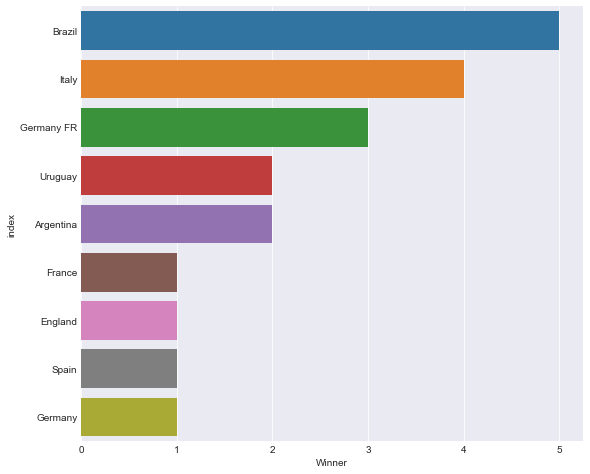

In [49]:
plt.figure(figsize=(9,8))
sns.barplot(x=win_counts['Winner'],y=win_counts['index'])



In [64]:
cups_data

,Year,Country,Winner,Runners-Up,Third,Fourth,GoalsScored,QualifiedTeams,MatchesPlayed,Attendance
0,1930,Uruguay,Uruguay,Argentina,USA,Yugoslavia,70,13,18,590.549
1,1934,Italy,Italy,Czechoslovakia,Germany,Austria,70,16,17,363.000
2,1938,France,Italy,Hungary,Brazil,Sweden,84,15,18,375.700
3,1950,Brazil,Uruguay,Brazil,Sweden,Spain,88,13,22,1.045.246
4,1954,Switzerland,Germany FR,Hungary,Austria,Uruguay,140,16,26,768.607
5,1958,Sweden,Brazil,Sweden,France,Germany FR,126,16,35,819.810
6,1962,Chile,Brazil,Czechoslovakia,Chile,Yugoslavia,89,16,32,893.172
7,1966,England,England,Germany FR,Portugal,Soviet Union,89,16,32,1.563.135
8,1970,Mexico,Brazil,Italy,Germany FR,Uruguay,95,16,32,1.603.975
9,1974,Germany,Germany FR,Netherlands,Poland,Brazil,97,16,38,1.865.753


In [83]:
winner_count = cups_data.groupby(["Year","Winner"]).count().reset_index()
runner_count=cups_data.groupby(["Year",'Runners-Up']).count().reset_index()

In [84]:
winner_counts=winner_count.Winner.value_counts()
runner_counts=runner_count['Runners-Up'].value_counts()

In [77]:
winner_counts

Brazil        5
Italy         4
Germany FR    3
Uruguay       2
Argentina     2
France        1
England       1
Spain         1
Germany       1
Name: Winner, dtype: int64

In [86]:
runner_counts.head()

Germany FR     3
Netherlands    3
Argentina      3
Italy          2
Hungary        2
Name: Runners-Up, dtype: int64

In [ ]:
sns.barplot(winner_counts[''])